Epoch 1/5


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4929 - loss: 0.6921 - val_accuracy: 0.6000 - val_loss: 0.6808
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5357 - loss: 0.6816 - val_accuracy: 0.5667 - val_loss: 0.6752
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5500 - loss: 0.6729 - val_accuracy: 0.6333 - val_loss: 0.6723
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5714 - loss: 0.6661 - val_accuracy: 0.6167 - val_loss: 0.6682
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.6591 - val_accuracy: 0.6667 - val_loss: 0.6645
Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5429 - loss: 0.6763 - val_accuracy: 0.5833 - val_loss: 0.6798
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.6533 - val_accuracy: 0.6000 - val_loss: 0.6735
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6857 - loss: 0.6386 - val_accuracy: 0.6333 - val_loss: 0.6685
Epoch 4/5
9/9 ━━━━━━━━━━

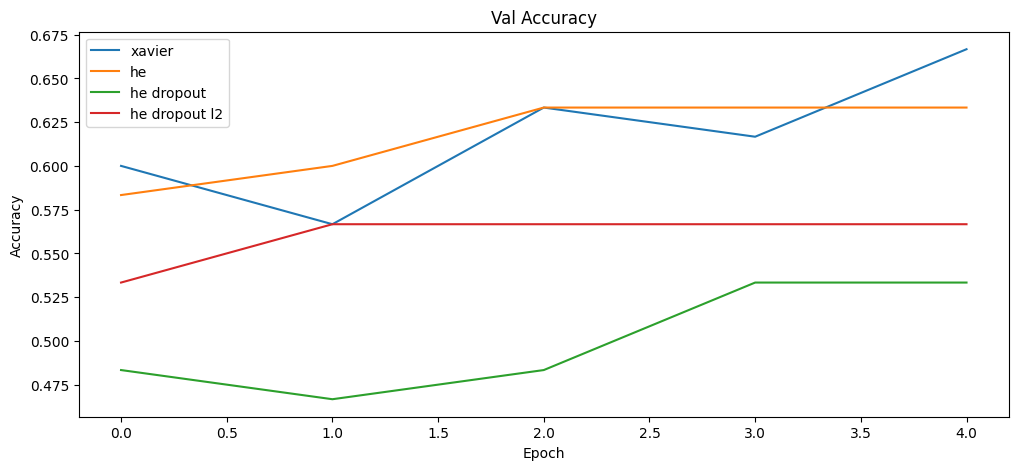

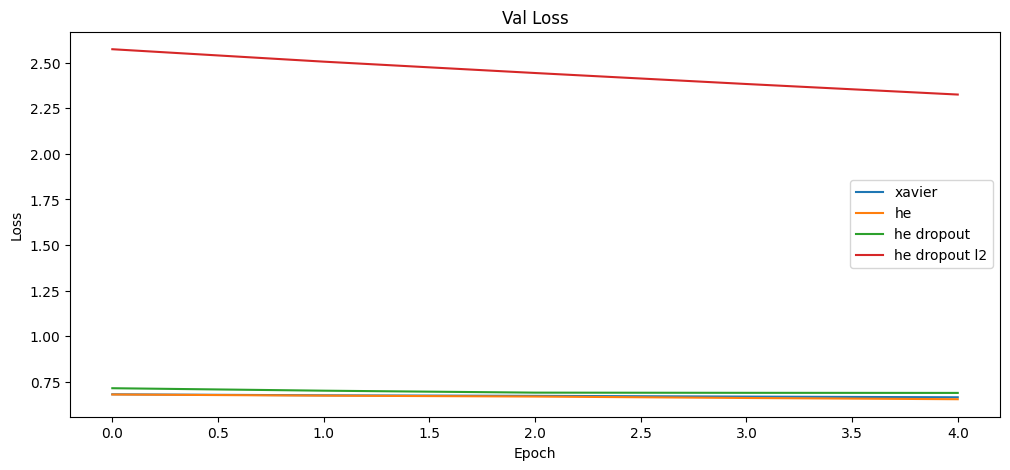

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2


np.random.seed(42)

X=np.random.rand(200,10).astype('float32')
Y=(np.sum(X,axis=1)>5).astype('float32')

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

def model_build(initil='glorot_uniform',dropout=False,L2=0.0):
    reg=l2(L2) if L2>0 else None
    model=Sequential()
    model.add(Dense(64,activation='relu',kernel_initializer=initil,kernel_regularizer=reg,input_shape=(x_train.shape[1],)))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu',kernel_initializer=initil,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model

config={
    'xavier':['glorot_uniform',False,0.0],
    'he':['he_uniform',False,0.0],
    'he dropout':['he_uniform',True,0.0],
    'he dropout l2':['he_uniform',True,0.01]
}


history={}
for name,(kernel,droupout,L2) in config.items():
    model=model_build(kernel,droupout,L2)
    h=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=16)
    history[name]=h.history


plt.figure(figsize=(12,5))
for name,h in history.items(): 
    plt.plot(h["val_accuracy"],label=name)

plt.title("Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
for name,h in history.items(): 
    plt.plot(h["val_loss"],label=name)

plt.title("Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
